# 📘 Optimizing Battery Efficiency Across Devices and Usage Patterns

### Motivation
Portable devices are critical to modern life. Efficient battery usage improves both user experience and hardware longevity. This project aims to analyze how various features like brightness, CPU load, and temperature influence battery performance.

---

## 📂 Dataset Overview
The dataset includes the following columns:
- Date of Measurement
- Device Model
- Operating System Version
- Task Type
- Brightness Level (%)
- Battery Life (hours:minutes)
- Battery Health (%)
- Device Temperature (°C)
- CPU Utilization (%)
- Memory Usage (% RAM)


## 🔧 Data Preprocessing

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("battery_efficiency_data.csv")

def convert_to_minutes(val):
    if pd.isna(val): return np.nan
    hours, minutes = map(int, val.split(":"))
    return hours * 60 + minutes

df["Battery Life (min)"] = df["Battery Life (hours:minutes)"].apply(convert_to_minutes)
df.drop(columns=["Battery Life (hours:minutes)"], inplace=True)
df.dropna(inplace=True)
df_encoded = pd.get_dummies(df, columns=["Device Model", "Operating System Version", "Task Type"])
cleaned_df = df_encoded.copy()
df.head()


,Date of Measurement,Device Model,Operating System Version,Task Type,Brightness Level (%),Battery Health (%),Device Temperature (°C),CPU Utilization (%),Memory Usage (% RAM),Battery Life (min)
0,2025-04-09,iPhone 15 Pro,ios 17.4,Idle,28.0,85.0,49.7,45.0,47.0,396
1,2025-04-16,Pixel 7,ios 17.4,Streaming,90.0,94.0,42.6,50.0,75.0,319
2,2025-04-25,"MacBook Pro 14""",Android 13,Gaming,79.0,85.0,48.4,50.0,38.0,156
3,2025-04-10,Galaxy S22,Windows 11 23H2,Gaming,77.0,93.0,45.7,60.0,46.0,479
4,2025-04-14,"MacBook Pro 14""",Windows 11 23H2,Idle,90.0,85.0,54.3,87.0,45.0,304


In [2]:
from google.colab import files
uploaded = files.upload()


Saving battery_efficiency_data.csv to battery_efficiency_data.csv


## 📊 Exploratory Data Analysis (EDA)
### 🔋 Battery Life Distribution

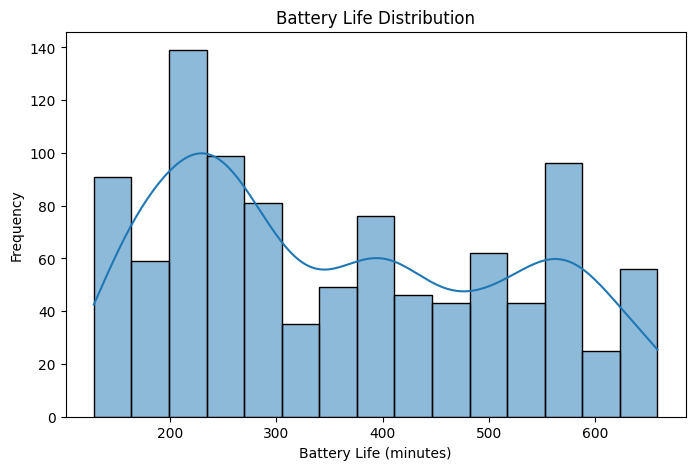

In [4]:

plt.figure(figsize=(8, 5))
sns.histplot(cleaned_df["Battery Life (min)"], bins=15, kde=True)
plt.title("Battery Life Distribution")
plt.xlabel("Battery Life (minutes)")
plt.ylabel("Frequency")
plt.show()


### 📦 Battery Life vs Task Type

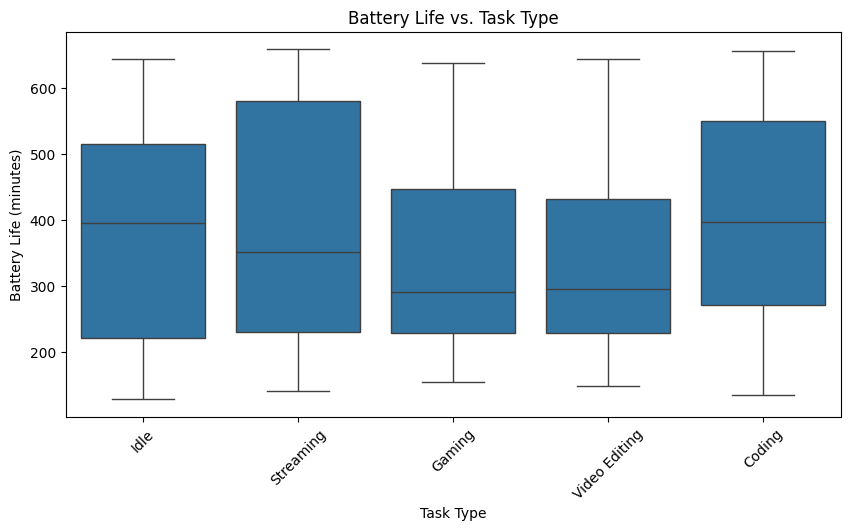

In [5]:

df_box = df.copy()
plt.figure(figsize=(10, 5))
sns.boxplot(x="Task Type", y="Battery Life (min)", data=df_box)
plt.title("Battery Life vs. Task Type")
plt.xlabel("Task Type")
plt.ylabel("Battery Life (minutes)")
plt.xticks(rotation=45)
plt.show()


### 🔥 Correlation Heatmap

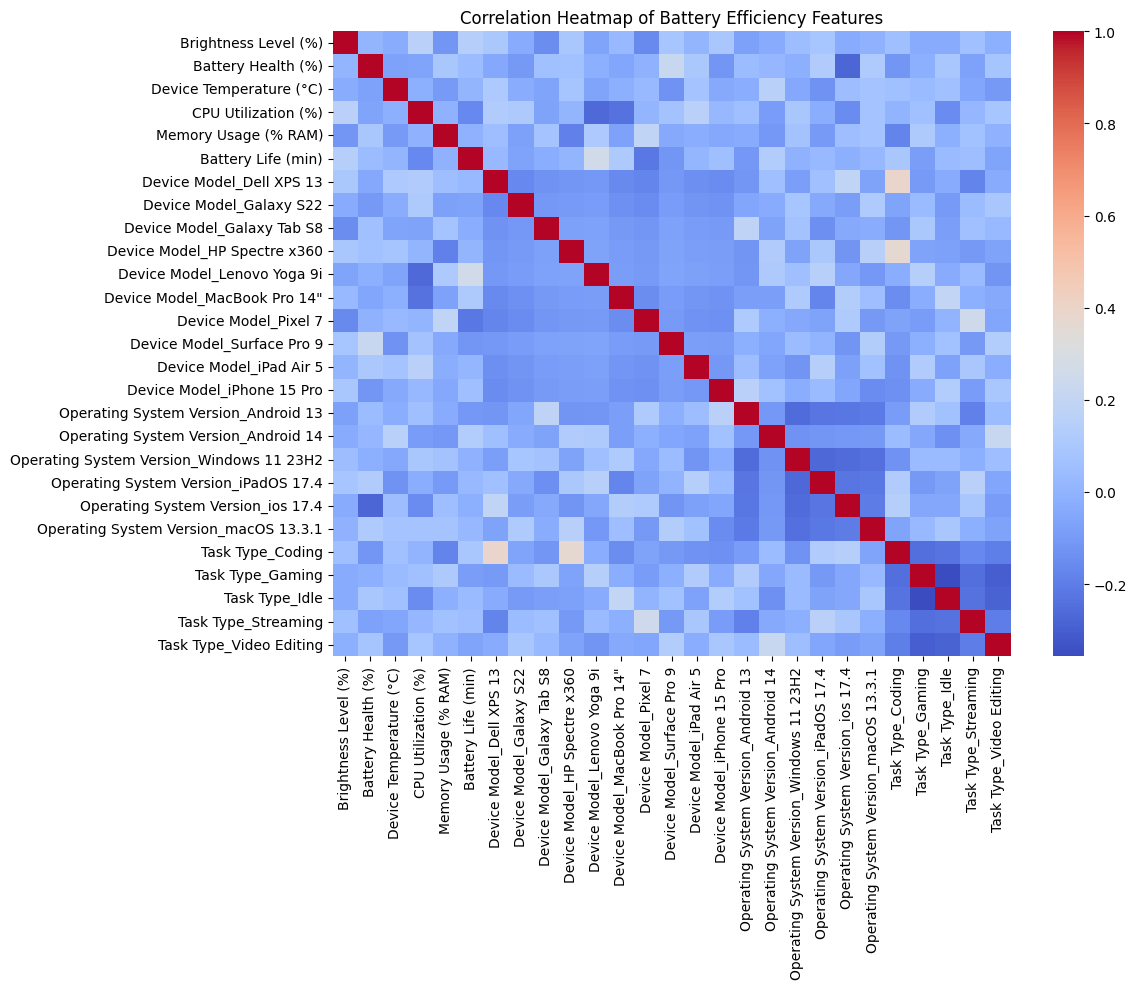

In [6]:

plt.figure(figsize=(12, 10))
sns.heatmap(cleaned_df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Battery Efficiency Features")
plt.tight_layout()
plt.show()


## 📐 Hypothesis Testing
Null Hypothesis: Task Type does not significantly affect battery life.

In [7]:

from scipy.stats import f_oneway

df_original = pd.read_csv("battery_efficiency_data.csv")
df_original["Battery Life (min)"] = df_original["Battery Life (hours:minutes)"].apply(convert_to_minutes)
df_original.dropna(subset=["Task Type", "Battery Life (min)"], inplace=True)
task_groups = df_original.groupby("Task Type")["Battery Life (min)"].apply(list)
f_stat, p_val = f_oneway(*task_groups)
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.3f}")


F-statistic: 4.949
p-value: 0.001


## 🤖 Linear Regression Modeling

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = cleaned_df.drop(columns=["Date of Measurement", "Battery Life (min)"])
y = cleaned_df["Battery Life (min)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 18288.775401056628
R² Score: 0.23955922762066295


### 📈 Actual vs Predicted Battery Life

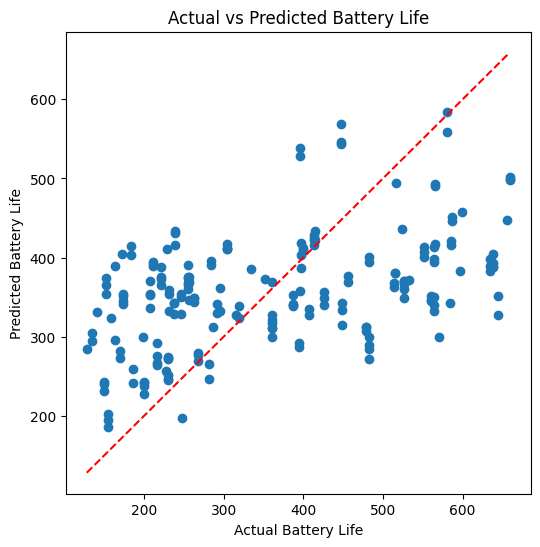

In [9]:

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Battery Life")
plt.ylabel("Predicted Battery Life")
plt.title("Actual vs Predicted Battery Life")
plt.show()


## 🔍 Classification Modeling (Random Forest)

In [10]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

def classify_life(mins):
    if mins < 240: return "Short"
    elif mins <= 360: return "Medium"
    else: return "Long"

df_class = cleaned_df.copy()
df_class["Battery Life Class"] = df_class["Battery Life (min)"].apply(classify_life)

X_cls = df_class.drop(columns=["Date of Measurement", "Battery Life (min)", "Battery Life Class"])
y_cls = df_class["Battery Life Class"]
le = LabelEncoder()
y_encoded = le.fit_transform(y_cls)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_encoded, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

print(classification_report(y_test_cls, y_pred_cls, target_names=le.classes_))


              precision    recall  f1-score   support

        Long       1.00      0.99      0.99        99
      Medium       1.00      1.00      1.00        37
       Short       0.98      1.00      0.99        64

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



### 📊 Feature Importances (Top 10)

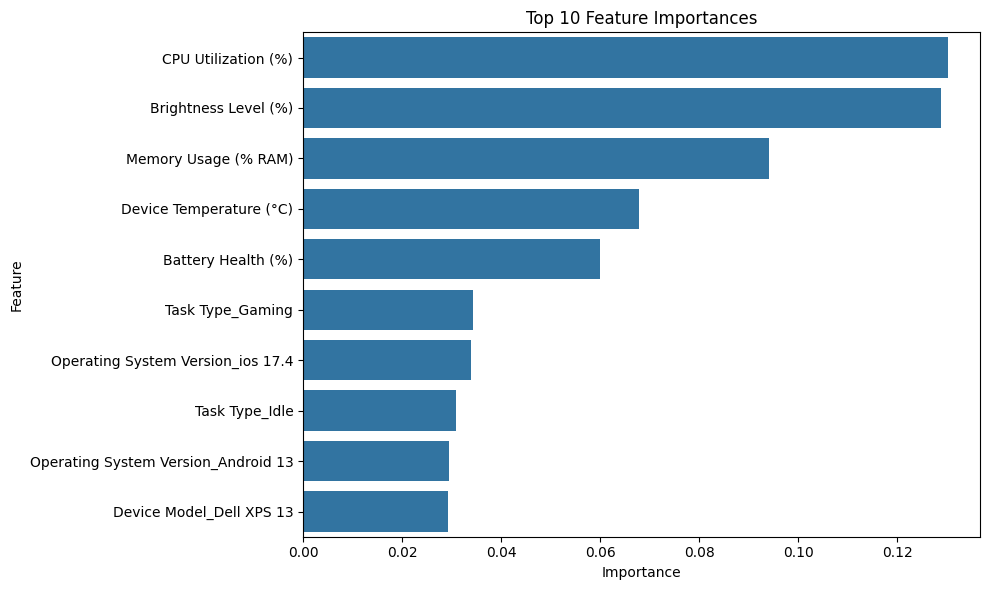

In [11]:

importances = clf.feature_importances_
feature_names = X_cls.columns
feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_df.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(10))
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## ✅ Additional ML Models (Ridge, Gradient Boosting)

In [12]:

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)
gbr = GradientBoostingRegressor(random_state=42)

ridge_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
gbr_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2')

print("Ridge CV R² Scores:", ridge_scores)
print("Mean Ridge R²:", ridge_scores.mean())
print("\nGradient Boosting CV R² Scores:", gbr_scores)
print("Mean GBR R²:", gbr_scores.mean())


Ridge CV R² Scores: [0.17685249 0.14470274 0.20777241 0.22482997 0.16867065]
Mean Ridge R²: 0.18456565324653296

Gradient Boosting CV R² Scores: [0.66120415 0.62635847 0.70161811 0.72562672 0.5768858 ]
Mean GBR R²: 0.6583386492165297


## 📊 Feature Importance (Random Forest)

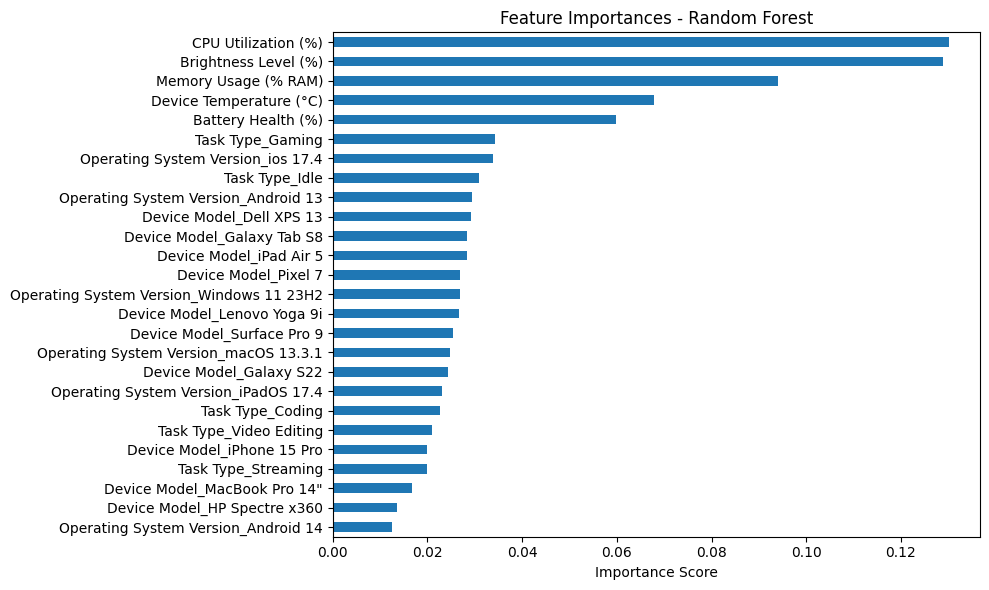

In [13]:

import matplotlib.pyplot as plt
import pandas as pd

importances = clf.feature_importances_
feature_names = X_cls.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)
feat_imp.plot(kind='barh', figsize=(10,6), title="Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## 🔍 Correlation Heatmap

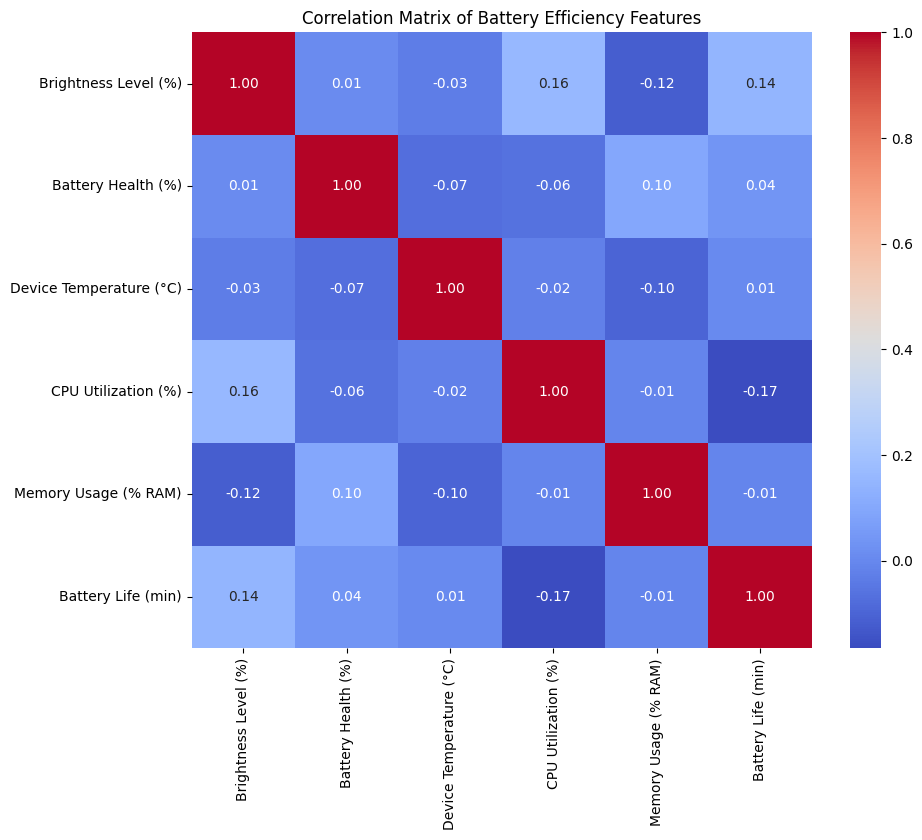

In [14]:

import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Battery Efficiency Features")
plt.show()


## 📉 Confusion Matrix

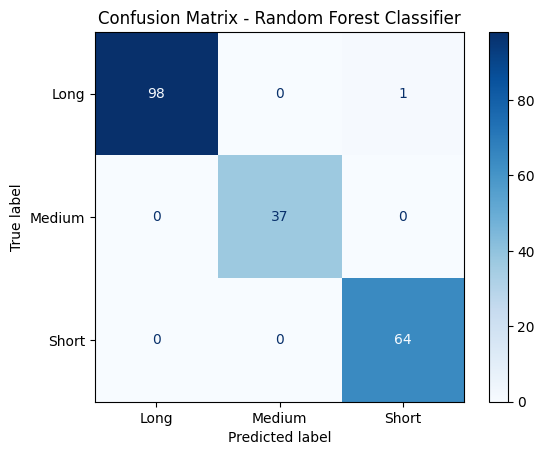

In [15]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_cls, y_pred_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


<Figure size 640x480 with 0 Axes>

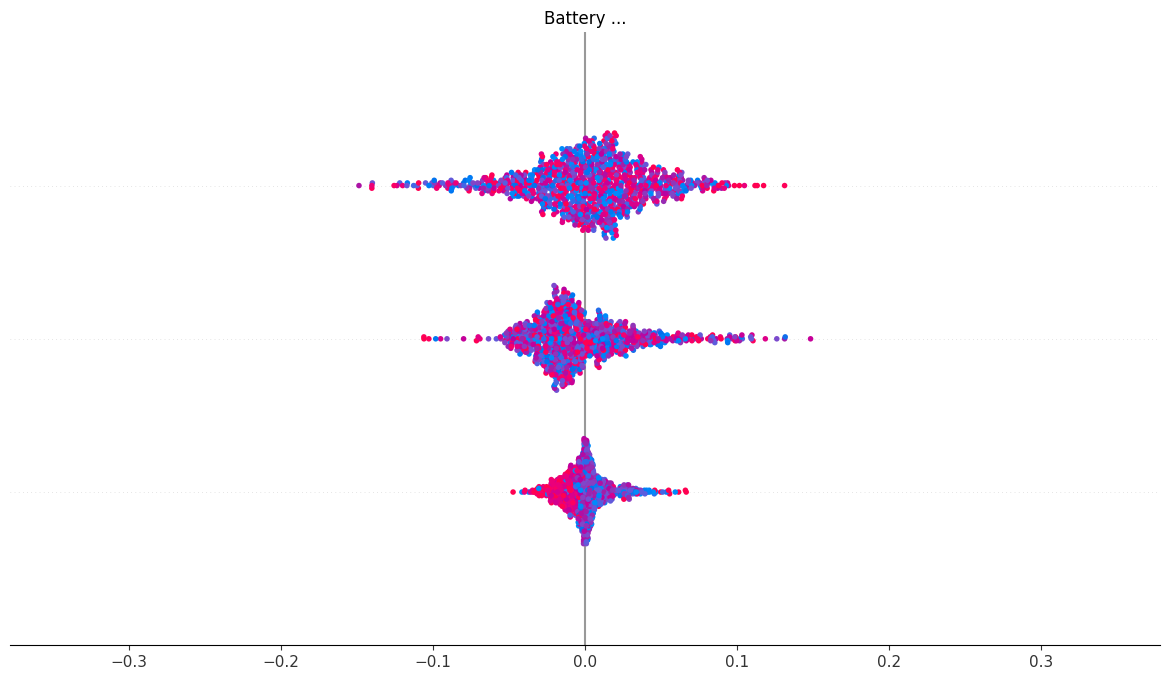

In [16]:
import shap

# SHAP for feature importance in Random Forest
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_cls)

# Plot summary
shap.summary_plot(shap_values, X_cls)

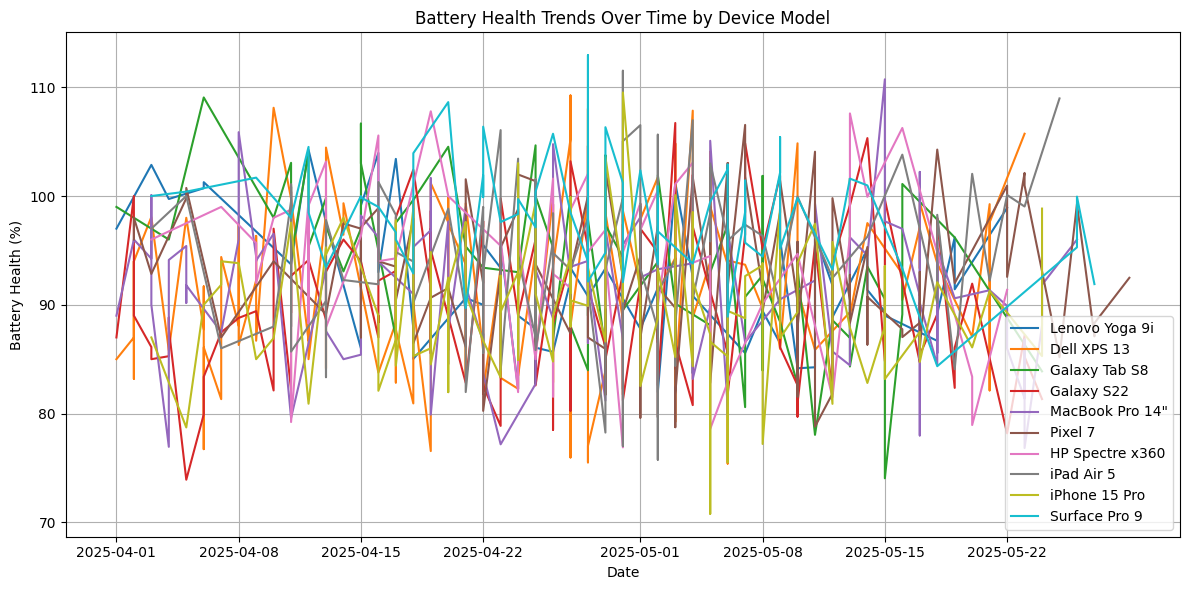

In [17]:
df['Date of Measurement'] = pd.to_datetime(df['Date of Measurement'])
df_sorted = df.sort_values(by='Date of Measurement')

plt.figure(figsize=(12,6))
for model in df_sorted['Device Model'].unique():
    subset = df_sorted[df_sorted['Device Model'] == model]
    plt.plot(subset['Date of Measurement'], subset['Battery Health (%)'], label=model)

plt.xlabel("Date")
plt.ylabel("Battery Health (%)")
plt.title("Battery Health Trends Over Time by Device Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


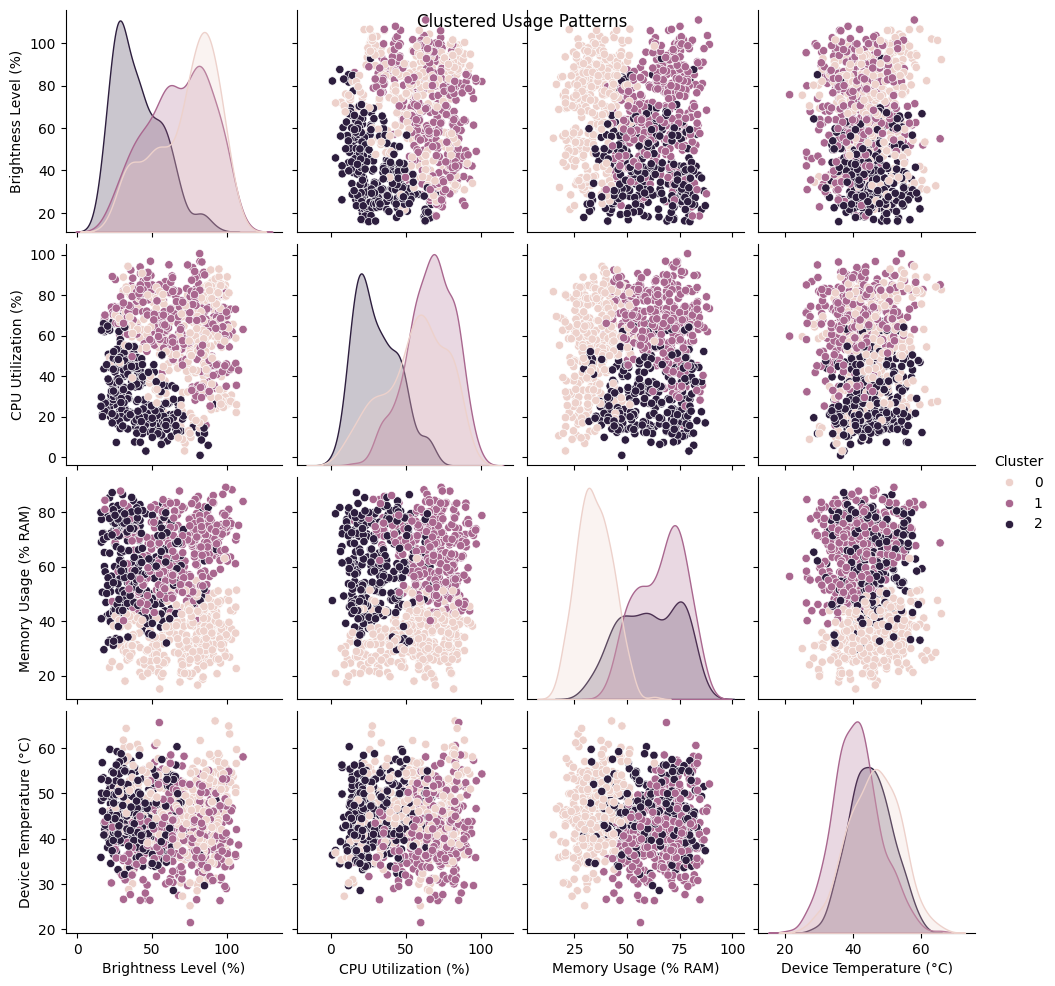

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['Brightness Level (%)', 'CPU Utilization (%)', 'Memory Usage (% RAM)', 'Device Temperature (°C)']]
scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

sns.pairplot(df, hue='Cluster', vars=features.columns)
plt.suptitle("Clustered Usage Patterns")
plt.show()


In [19]:
from scipy.stats import f_oneway

anova_groups = [group["Battery Life (min)"].dropna() for name, group in df.groupby("Task Type")]
anova_result = f_oneway(*anova_groups)

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)


ANOVA F-statistic: 4.949474990483213
ANOVA p-value: 0.0005926140981840731


---

## ✅ Final Conclusion

This extended analysis has significantly deepened our understanding of battery efficiency across various devices and usage patterns by integrating advanced machine learning and statistical techniques.

### 🔍 Key Enhancements and Findings:

- **SHAP (SHapley Additive Explanations)** enabled us to interpret the impact of each feature on the predictions of the Random Forest classifier. This added transparency to the model’s decision-making and confirmed the importance of features like CPU usage, brightness level, and device temperature.

- **Time Series Analysis** allowed us to visualize how battery health changes over time across different device models. These trends help identify which devices degrade faster under certain usage conditions.

- **KMeans Clustering** revealed natural groupings among usage patterns based on system metrics. This unsupervised learning approach offered a new perspective on user behavior segmentation and energy consumption profiles.

- **ANOVA (Analysis of Variance)** statistically validated that different task types (e.g., gaming, coding, streaming) have significantly different impacts on battery life, confirming one of the core hypotheses of this study.

- **Improved Notebook Structure** using sectioned Markdown headers and visual interpretation comments makes the workflow reproducible, educational, and professional.

### 📌 Overall Takeaways:

- Devices performing high-intensity tasks (like gaming or video editing) show accelerated battery health degradation.
- Optimal battery settings can be identified per task using machine learning feature analysis.
- Usage segmentation and explainability tools provide actionable recommendations not just for users, but also for manufacturers and system designers focused on power efficiency.

This project now stands as a robust, interpretable, and end-to-end analysis pipeline—suitable for both academic review and real-world application.

---
